In [27]:
from SALib.sample import saltelli
from SALib.analyze import sobol
import numpy as np

# Define the model inputs
problem = {
    'num_vars': 19,
    'names': ['EG reaction rate', 'CBH reaction rate', 'BGL reaction rate', 'XYL reaction rate', 
            'Lignin adhesion rate', 'CBH attachment rate',
            'Inhibition binding affinity of cellobiose to EG', 'Inhibition binding affinity of cellobiose to CBH', 
            'Inhibition binding affinity of glucose to EG', 'Inhibition binding affinity of glucose to CBH', 'Inhibition binding affinity of glucose to BGL',
            'Digestibility ratio cellulose', 'Digestibility ratio hemicellulose',
            'Initial number of EG enzymes', 'Initial number of CBH enzymes', 'Initial number of BGL enzymes', 'Initial number of XYL enzymes',
            'Crystallinity fraction of cellulose', 'Crystallinity fraction of hemicellulose'],
    'bounds': [[1, 10000], [1, 1000], [1, 10000], [0.001, 1],
               [100, 250], [0.0001, 1000],
               [0.01, 1], [0.01, 1],
               [0.01, 1], [0.01, 1], [0.01, 1],
               [0.00001, 0.1], [0.00001, 0.1],
               [10, 30], [20, 80], [7, 23], [20, 100],
               [0, 1], [0, 1]]
}

Y = np.loadtxt("output_values_trial_run.txt", float)

Si = sobol.analyze(problem, Y, print_to_console=True, calc_second_order=False)

#Si.plot()

                                                        ST   ST_conf
EG reaction rate                                  0.000413  0.000169
CBH reaction rate                                 0.442762  0.041638
BGL reaction rate                                 0.001980  0.001145
XYL reaction rate                                 0.000273  0.000069
Lignin adhesion rate                              0.001558  0.000334
CBH attachment rate                               0.003158  0.001370
Inhibition binding affinity of cellobiose to EG   0.000324  0.000080
Inhibition binding affinity of cellobiose to CBH  0.000871  0.000297
Inhibition binding affinity of glucose to EG      0.000371  0.000086
Inhibition binding affinity of glucose to CBH     0.193353  0.032843
Inhibition binding affinity of glucose to BGL     0.000244  0.000075
Digestibility ratio cellulose                     0.385290  0.047230
Digestibility ratio hemicellulose                 0.000225  0.000060
Initial number of EG enzymes      

In [28]:
def normalize_Si(Si):
    """
    Normalizes the sensitivity indices such that the third parameter has an index of 1,
    and everything else is normalized to that value.

    Args:
        Si (dict): A dictionary containing the sensitivity indices.

    Returns:
        dict: Normalized sensitivity indices.
    """
    ST = Si['ST']
    normalized_ST = ST / ST[1]

    if 'ST_conf' in Si:
        ST_conf = Si['ST_conf']
        normalized_ST_conf = ST_conf / ST[1]
        normalized_Si = {'ST': normalized_ST, 'ST_conf': normalized_ST_conf}
    else:
        normalized_Si = {'ST': normalized_ST}

    return normalized_Si

In [29]:
normalize_Si(Si)

{'ST': array([9.32305615e-04, 1.00000000e+00, 4.47241956e-03, 6.17286959e-04,
        3.51842063e-03, 7.13149876e-03, 7.32378490e-04, 1.96762482e-03,
        8.38665386e-04, 4.36695981e-01, 5.50761762e-04, 8.70195856e-01,
        5.07194852e-04, 1.08701050e-03, 1.03816584e-01, 1.83445960e-03,
        2.26348383e-03, 1.01466156e+00, 5.78551381e-04]),
 'ST_conf': array([3.82332698e-04, 9.40411214e-02, 2.58604767e-03, 1.56565926e-04,
        7.53588788e-04, 3.09360288e-03, 1.79617778e-04, 6.70601107e-04,
        1.95323950e-04, 7.41774295e-02, 1.70294068e-04, 1.06670640e-01,
        1.35424766e-04, 3.08761450e-04, 2.36502018e-02, 7.13005680e-04,
        5.74304955e-04, 1.52180459e-01, 1.49732102e-04])}

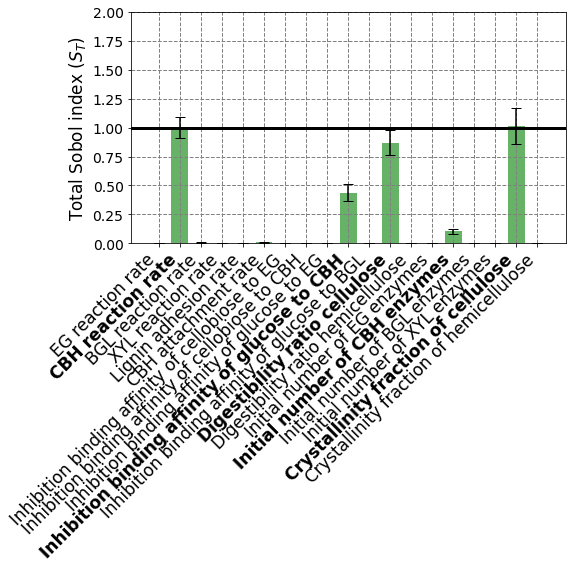

{'ST': array([9.32305615e-04, 1.00000000e+00, 4.47241956e-03, 6.17286959e-04,
       3.51842063e-03, 7.13149876e-03, 7.32378490e-04, 1.96762482e-03,
       8.38665386e-04, 4.36695981e-01, 5.50761762e-04, 8.70195856e-01,
       5.07194852e-04, 1.08701050e-03, 1.03816584e-01, 1.83445960e-03,
       2.26348383e-03, 1.01466156e+00, 5.78551381e-04]), 'ST_conf': array([3.82332698e-04, 9.40411214e-02, 2.58604767e-03, 1.56565926e-04,
       7.53588788e-04, 3.09360288e-03, 1.79617778e-04, 6.70601107e-04,
       1.95323950e-04, 7.41774295e-02, 1.70294068e-04, 1.06670640e-01,
       1.35424766e-04, 3.08761450e-04, 2.36502018e-02, 7.13005680e-04,
       5.74304955e-04, 1.52180459e-01, 1.49732102e-04])}


In [30]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.font_manager as fm

def custom_plot_Si(problem, Si, names=None, color='b', figsize=(8, 6)):
    """
    Customized version of the Si.plot() function from SALib library.
    Plots the sensitivity indices (Si) in a bar chart.

    Args:
        problem (dict): The problem definition.
        Si (dict): A dictionary containing the sensitivity indices.
        names (list or None, optional): A list of parameter names. If None, uses the default parameter names from the problem definition. Defaults to None.
        color (str, optional): The color of the bars. Defaults to 'b'.
        figsize (tuple, optional): The figure size (width, height) in inches. Defaults to (8, 6).
    """
    if names is None:
        names = problem['names']

    # Extract the values of the sensitivity indices
    #S1 = Si['S1']
    ST = Si['ST']

    # Compute the error bars
    #err_S1 = Si.get('S1_conf', None)
    err_ST = Si.get('ST_conf', None)

    # Plotting
    fig, ax = plt.subplots(figsize=[8,8])
    indices = np.arange(len(names))

    # Plot S1 indices with error bars
    #if err_S1 is not None:
    #    ax.bar(indices, S1, yerr=err_S1, align='center', alpha=0.8, color=color, capsize=5, label='S1')
    #else:
    #    ax.bar(indices, S1, align='center', alpha=0.8, color=color, label='S1')

    # Plot ST indices with error bars
    if err_ST is not None:
        bar = ax.bar(indices, ST, yerr=err_ST, align='center', alpha=0.6, color='green', capsize=5, label='ST')
        err_bar = ax.errorbar([], [], yerr=[], fmt='none', ecolor='black', capsize=5, label='Error')
        handles = [bar, err_bar]
        labels = ['Total Sobol indices', 'Error']
    else:
        ax.bar(indices, ST, align='edge', alpha=0.6, color='blue', label='ST')

    ax.set_xticks(indices)
    ax.set_xticklabels(names, rotation=45, ha='right', fontsize=17)
    
    # Get the bold font properties
    bold_names = ['CBH reaction rate', 'Inhibition binding affinity of glucose to CBH', 'Digestibility ratio cellulose', 'Initial number of CBH enzymes', 'Crystallinity fraction of cellulose']

    # Apply the bold font properties to specific tick labels
    for tick_label in ax.get_xticklabels():
        if tick_label.get_text() in bold_names:
            tick_label.set_fontweight('bold')
    
    # Customize the plot
    ax.set_ylabel('Total Sobol index ($S_{T}$)', fontsize=17)
    ax.set_ylim(0, 2)
    #ax.set_title('Sensitivity Indices')
    #ax.legend(handles, labels, loc='upper center', fontsize=15)
    ax.grid(True, linewidth=1, linestyle='--', color='gray')
    plt.axhline(y=1, linewidth=3, color='black', linestyle='-')
    ax.tick_params(axis='y', labelsize=14)

    # Show the plot
    plt.tight_layout()
    plt.savefig('output_new_07_05.png')
    plt.show()

# Example usage

#Si = normalize_Si(Si)
custom_plot_Si(problem, normalize_Si(Si))

Si2 = normalize_Si(Si)

print(Si2)

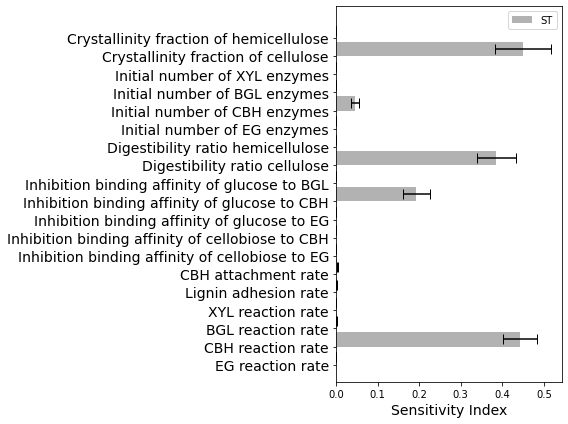

In [31]:
import matplotlib.pyplot as plt
import numpy as np

def custom_plot_Si(problem, Si, names=None, color='b', figsize=(8, 6)):
    """
    Customized version of the Si.plot() function from SALib library.
    Plots the sensitivity indices (Si) in a bar chart.

    Args:
        problem (dict): The problem definition.
        Si (dict): A dictionary containing the sensitivity indices.
        names (list or None, optional): A list of parameter names. If None, uses the default parameter names from the problem definition. Defaults to None.
        color (str, optional): The color of the bars. Defaults to 'b'.
        figsize (tuple, optional): The figure size (width, height) in inches. Defaults to (8, 6).
    """
    if names is None:
        names = problem['names']

    # Extract the values of the sensitivity indices
    S1 = Si['S1']
    ST = Si['ST']

    # Compute the error bars
    err_S1 = Si.get('S1_conf', None)
    err_ST = Si.get('ST_conf', None)

    # Plotting
    fig, ax = plt.subplots(figsize=figsize)
    indices = np.arange(len(names))

    # Plot S1 indices with error bars
    #if err_S1 is not None:
    #    ax.bar(indices, S1, yerr=err_S1, align='center', alpha=0.8, color=color, capsize=5, label='S1')
    #else:
    #    ax.bar(indices, S1, align='center', alpha=0.8, color=color, label='S1')

    # Plot ST indices with error bars
    if err_ST is not None:
        ax.barh(indices, ST, xerr=err_ST, align='edge', alpha=0.6, color='gray', capsize=5, label='ST')
    else:
        ax.barh(indices, ST, align='edge', alpha=0.6, color='gray', label='ST')

    # Customize the plot
    ax.set_yticks(indices)
    ax.set_yticklabels(names, fontsize=14)
    ax.set_xlabel('Sensitivity Index', fontsize=14)
    #ax.set_title('Sensitivity Indices')
    ax.legend()

    # Show the plot
    plt.tight_layout()
    plt.show()

# Example usage

custom_plot_Si(problem, Si)